In [1]:
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv("FinalCleanedData.csv")

In [4]:
df.shape

(221413, 43)

In [5]:
df.describe()

,RFHYPE5,RFCHOL2,MICHD,CVDSTRK3,CASTHM1,CHCSCNCR,CHCOCNCR,CHCCOPD2,CHCKDNY2,DIABETE4,...,RFDRHV7,TOTINDA,STRFREQ,FRUTDA2,FTJUDA2,GRENDA1,FRNCHDA,POTADA1,VEGEDA2,HIVRISK5
count,221413.000000,221413.000000,221413.000000,221413.000000,221413.000000,221413.000000,221413.000000,221413.000000,221413.000000,221413.000000,...,221413.000000,221413.000000,221413.000000,221413.000000,221413.000000,221413.000000,221413.000000,221413.000000,221413.000000,221413.000000
mean,0.422437,0.386924,0.089683,0.041660,0.093373,0.107663,0.105224,0.080325,0.039194,0.143284,...,0.061984,0.754874,1.484135,1.058347,0.255187,0.539718,0.180987,0.207996,0.878139,1.961958
std,0.493948,0.487047,0.285728,0.199811,0.290955,0.309955,0.306843,0.271796,0.194056,0.350363,...,0.241127,0.430163,2.111679,0.893913,0.435036,0.501214,0.206666,0.218510,0.674672,0.191298
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.430000,0.000000,0.140000,0.030000,0.070000,0.430000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.020000,0.430000,0.140000,0.140000,0.860000,2.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,3.000000,1.140000,0.290000,0.710000,0.290000,0.290000,1.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,7.000000,5.000000,3.000000,4.000000,1.000000,1.000000,5.000000,2.000000


In [6]:
all_col = ['RFHYPE5', 'RFCHOL2', 'MICHD', 'CVDSTRK3', 'CASTHM1', 'CHCSCNCR',
       'CHCOCNCR', 'CHCCOPD2', 'CHCKDNY2', 'DIABETE4', 'DRDXAR2', 'SEXVAR',
       'GENHLTH', 'PHYS14D', 'MENT14D', 'POORHLTH', 'HLTHPLN1', 'PERSDOC2',
       'MEDCOST', 'CHECKUP1', 'MARITAL', 'EDUCA', 'RENTHOM1', 'VETERAN3',
       'EMPLOY1', 'CHLDCNT', 'INCOME2', 'WTKG3', 'HTM4', 'PREGNANT', 'DEAF',
       'BLIND', 'RFSMOK3', 'RFDRHV7', 'TOTINDA', 'STRFREQ', 'FRUTDA2',
       'FTJUDA2', 'GRENDA1', 'FRNCHDA', 'POTADA1', 'VEGEDA2', 'HIVRISK5']
len(all_col)

43

In [7]:
x_col = ['SEXVAR', 'GENHLTH', 'PHYS14D', 'MENT14D', 'POORHLTH', 'HLTHPLN1',
       'PERSDOC2', 'MEDCOST', 'CHECKUP1', 'MARITAL', 'EDUCA', 'RENTHOM1',
       'VETERAN3', 'EMPLOY1', 'CHLDCNT', 'INCOME2', 'WTKG3', 'HTM4',
       'PREGNANT', 'DEAF', 'BLIND', 'RFSMOK3', 'RFDRHV7', 'TOTINDA', 'STRFREQ',
       'FRUTDA2', 'FTJUDA2', 'GRENDA1', 'FRNCHDA', 'POTADA1', 'VEGEDA2',
       'HIVRISK5']
len(x_col)
#non-medical only

32

In [8]:
target_d = ["MICHD", "CHCCOPD2", "CHCKDNY2", "CVDSTRK3", "DIABETE4"]
# heart disease - MICHD , lung disease - CHCCOPD2, kidney disease - CHCKDNY2, 
# stroke - CVDSTRK3, diabetes - DIABETE4

In [9]:
df.dtypes
#all are int64

RFHYPE5       int64
RFCHOL2       int64
MICHD         int64
CVDSTRK3      int64
CASTHM1       int64
CHCSCNCR      int64
CHCOCNCR      int64
CHCCOPD2      int64
CHCKDNY2      int64
DIABETE4      int64
DRDXAR2       int64
SEXVAR        int64
GENHLTH       int64
PHYS14D       int64
MENT14D       int64
POORHLTH      int64
HLTHPLN1      int64
PERSDOC2      int64
MEDCOST       int64
CHECKUP1      int64
MARITAL       int64
EDUCA         int64
RENTHOM1      int64
VETERAN3      int64
EMPLOY1       int64
CHLDCNT       int64
INCOME2       int64
WTKG3         int64
HTM4          int64
PREGNANT      int64
DEAF          int64
BLIND         int64
RFSMOK3       int64
RFDRHV7       int64
TOTINDA       int64
STRFREQ     float64
FRUTDA2     float64
FTJUDA2     float64
GRENDA1     float64
FRNCHDA     float64
POTADA1     float64
VEGEDA2     float64
HIVRISK5      int64
dtype: object

In [10]:
df[df.isna().any(axis=1)]
# all no NA values

,RFHYPE5,RFCHOL2,MICHD,CVDSTRK3,CASTHM1,CHCSCNCR,CHCOCNCR,CHCCOPD2,CHCKDNY2,DIABETE4,...,RFDRHV7,TOTINDA,STRFREQ,FRUTDA2,FTJUDA2,GRENDA1,FRNCHDA,POTADA1,VEGEDA2,HIVRISK5


In [11]:
df[df.isnull().any(axis=1)]
# no null values

,RFHYPE5,RFCHOL2,MICHD,CVDSTRK3,CASTHM1,CHCSCNCR,CHCOCNCR,CHCCOPD2,CHCKDNY2,DIABETE4,...,RFDRHV7,TOTINDA,STRFREQ,FRUTDA2,FTJUDA2,GRENDA1,FRNCHDA,POTADA1,VEGEDA2,HIVRISK5


# Data PP

In [12]:
df.describe()
# we are mostly dealing with categorical data but some columns dont just range from 0-1 but 
# ranges from 0-8 or "Height" which is in cm and can range to 3 digits (100+cm).
# thus we need to scale data to [0-1] 

,RFHYPE5,RFCHOL2,MICHD,CVDSTRK3,CASTHM1,CHCSCNCR,CHCOCNCR,CHCCOPD2,CHCKDNY2,DIABETE4,...,RFDRHV7,TOTINDA,STRFREQ,FRUTDA2,FTJUDA2,GRENDA1,FRNCHDA,POTADA1,VEGEDA2,HIVRISK5
count,221413.000000,221413.000000,221413.000000,221413.000000,221413.000000,221413.000000,221413.000000,221413.000000,221413.000000,221413.000000,...,221413.000000,221413.000000,221413.000000,221413.000000,221413.000000,221413.000000,221413.000000,221413.000000,221413.000000,221413.000000
mean,0.422437,0.386924,0.089683,0.041660,0.093373,0.107663,0.105224,0.080325,0.039194,0.143284,...,0.061984,0.754874,1.484135,1.058347,0.255187,0.539718,0.180987,0.207996,0.878139,1.961958
std,0.493948,0.487047,0.285728,0.199811,0.290955,0.309955,0.306843,0.271796,0.194056,0.350363,...,0.241127,0.430163,2.111679,0.893913,0.435036,0.501214,0.206666,0.218510,0.674672,0.191298
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.430000,0.000000,0.140000,0.030000,0.070000,0.430000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.020000,0.430000,0.140000,0.140000,0.860000,2.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,3.000000,1.140000,0.290000,0.710000,0.290000,0.290000,1.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,7.000000,5.000000,3.000000,4.000000,1.000000,1.000000,5.000000,2.000000


In [13]:
import warnings
warnings.filterwarnings("ignore")

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)
print(scaled)

[[1.    1.    0.    ... 0.43  0.1   1.   ]
 [0.    0.    0.    ... 0.07  0.2   1.   ]
 [1.    0.    0.    ... 0.14  0.2   1.   ]
 ...
 [0.    0.    0.    ... 0.14  0.028 0.   ]
 [0.    1.    0.    ... 0.1   0.004 1.   ]
 [0.    0.    0.    ... 0.29  0.2   1.   ]]


In [15]:
def plots(df, var, t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('before ' + str(t).split('(')[0])
    
    plt.subplot(122)
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('after ' + str(t).split('(')[0])

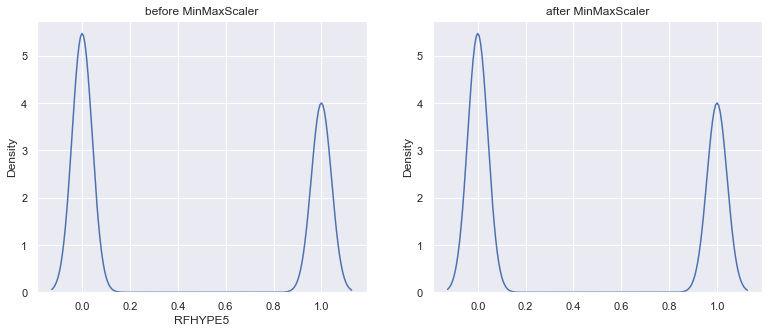

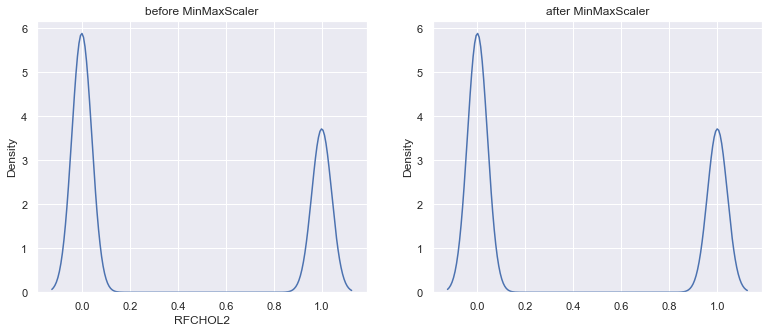

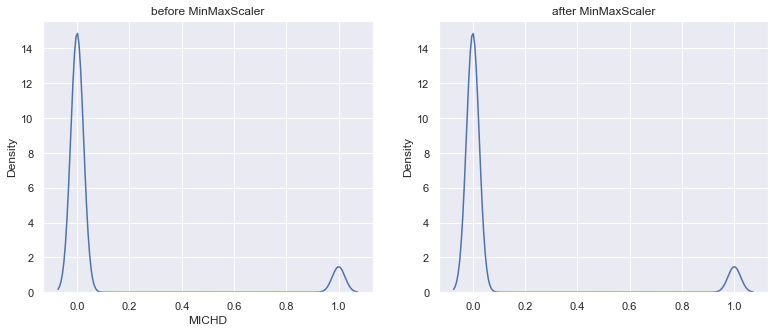

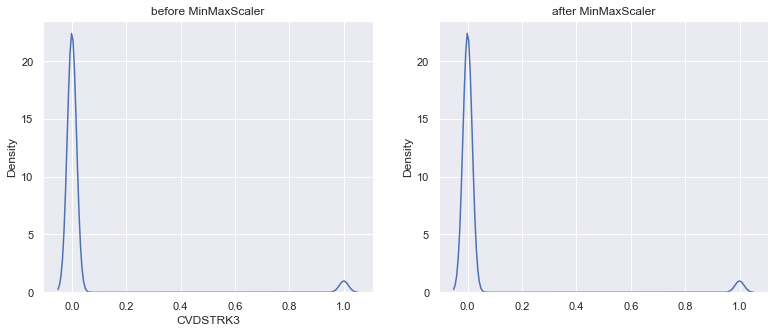

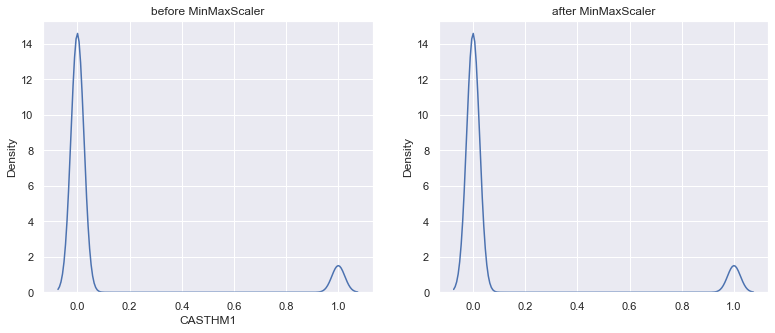

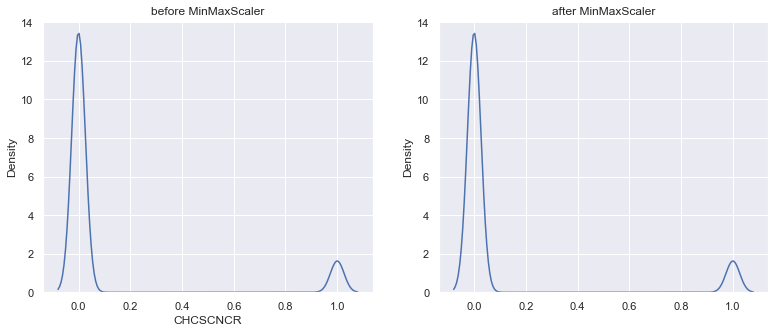

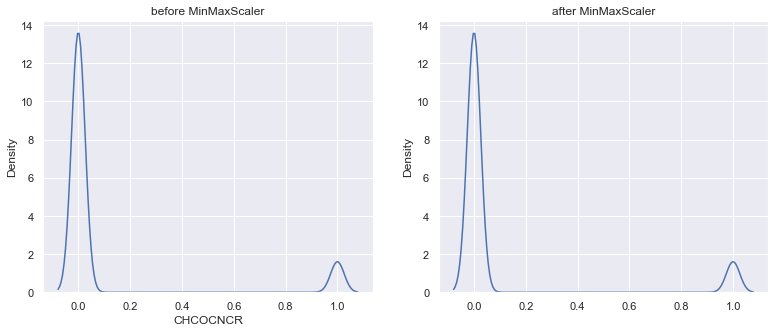

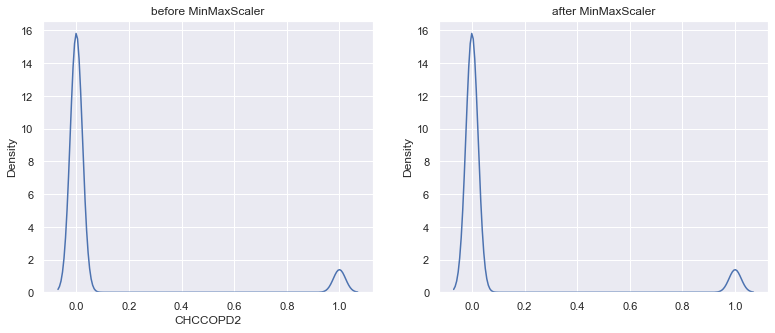

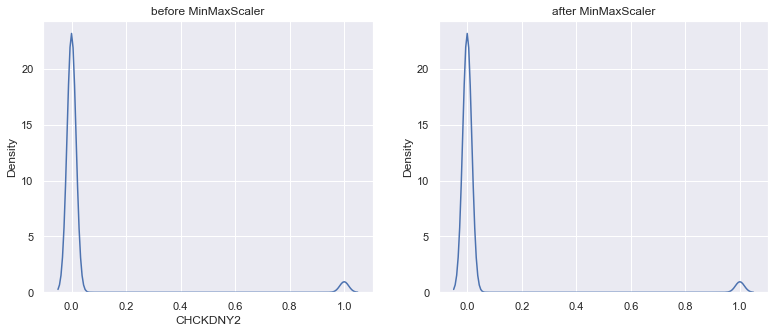

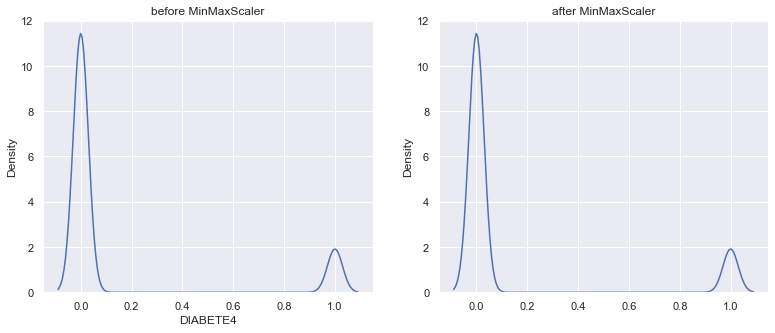

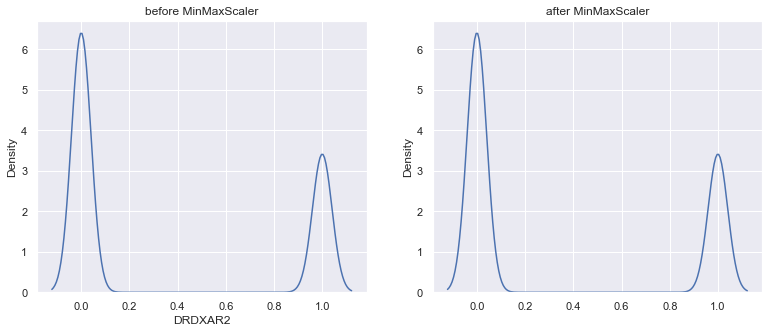

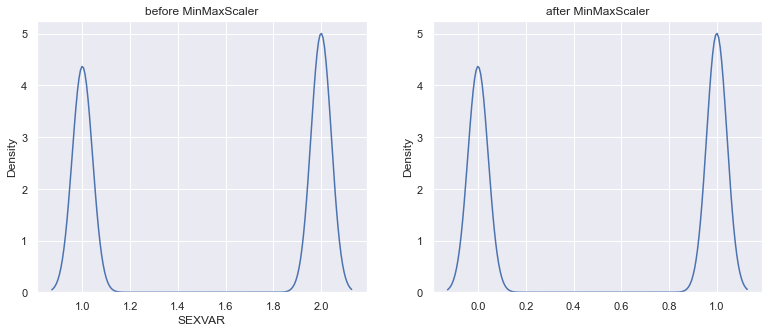

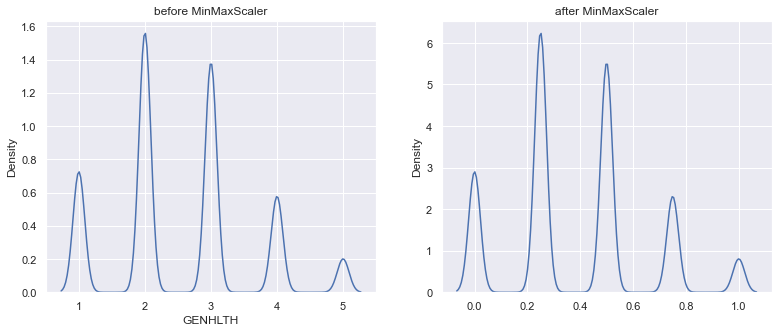

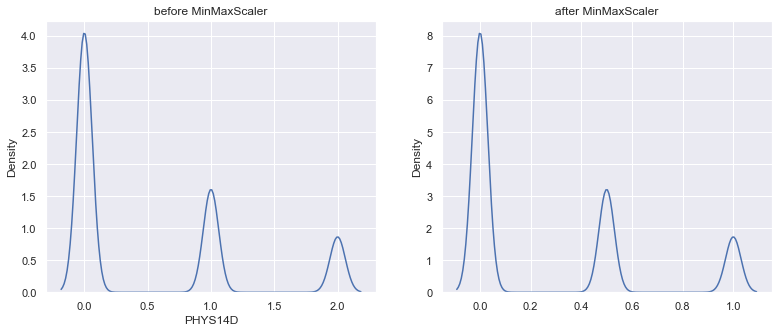

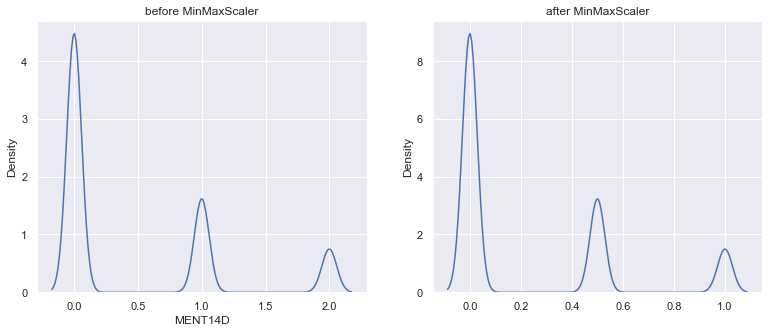

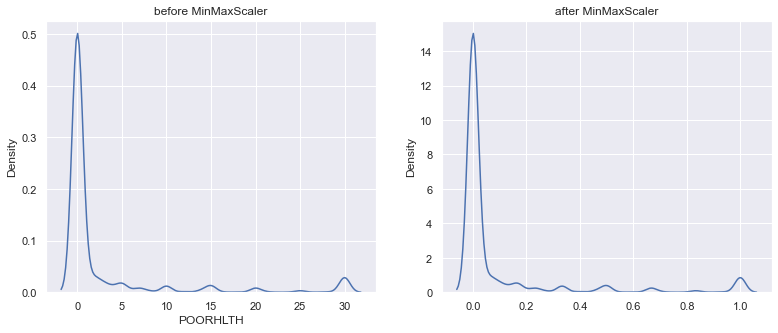

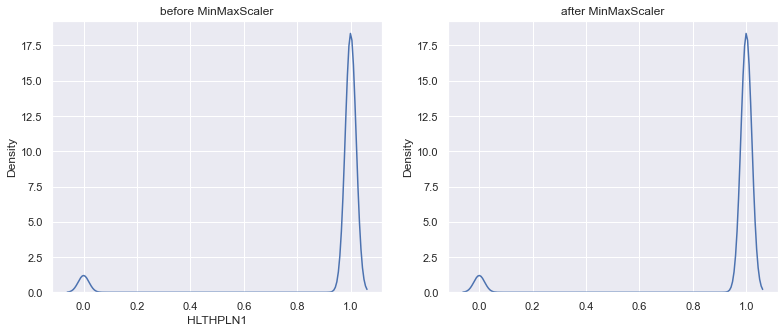

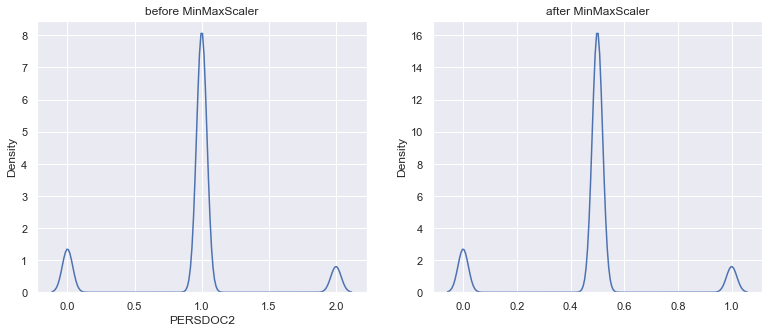

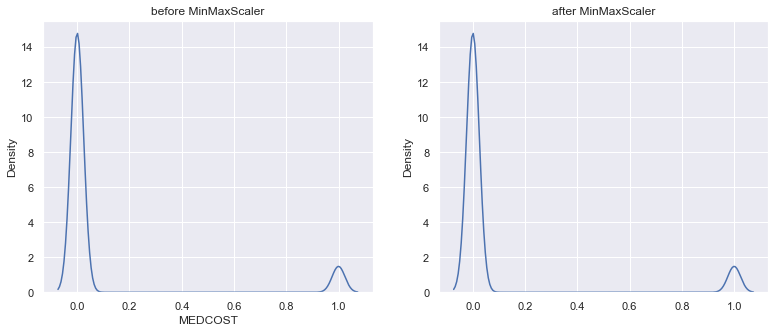

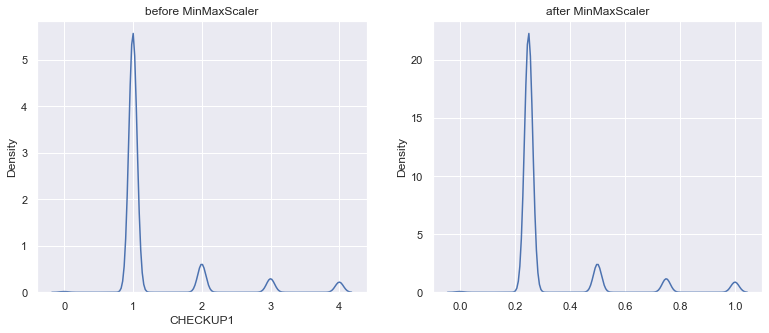

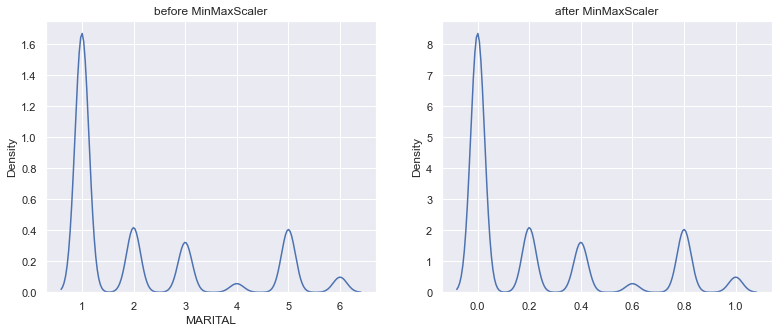

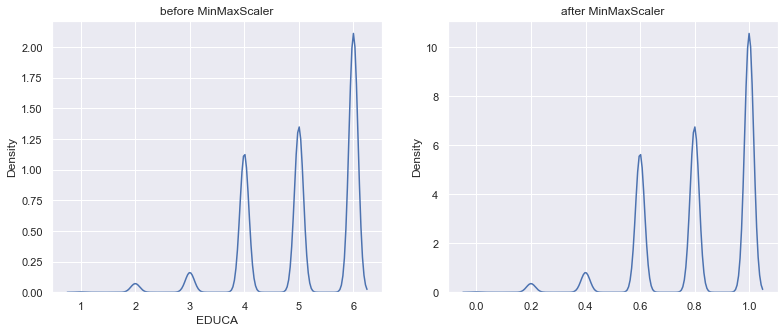

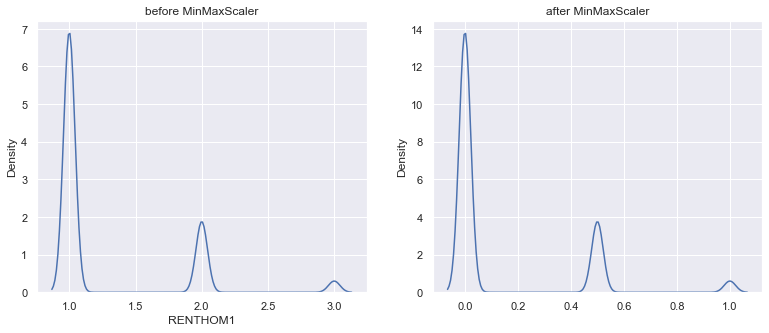

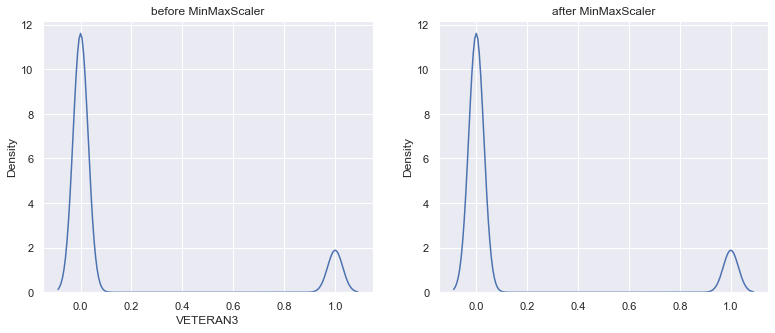

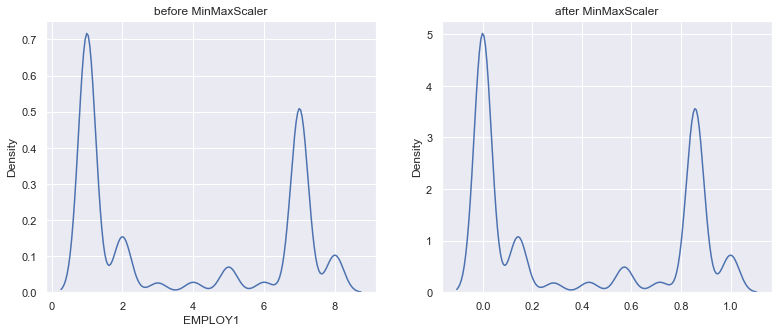

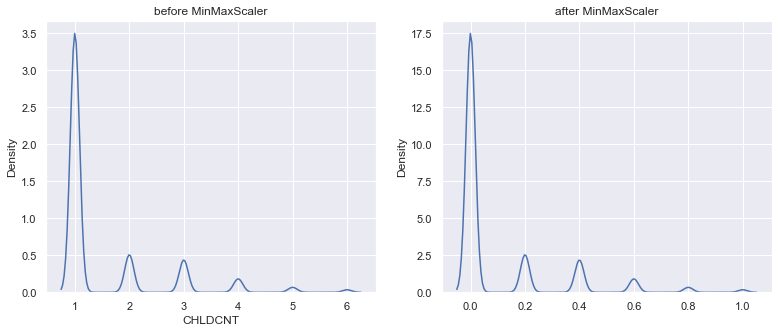

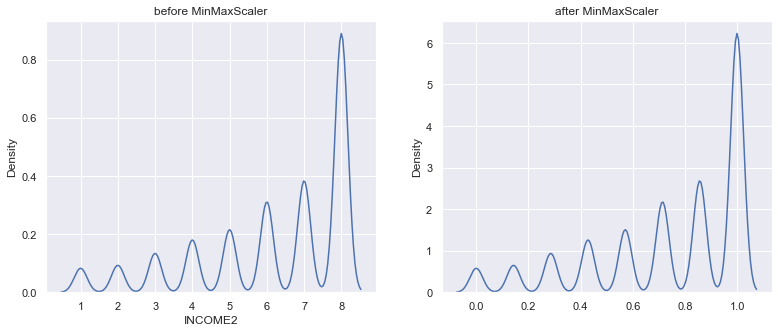

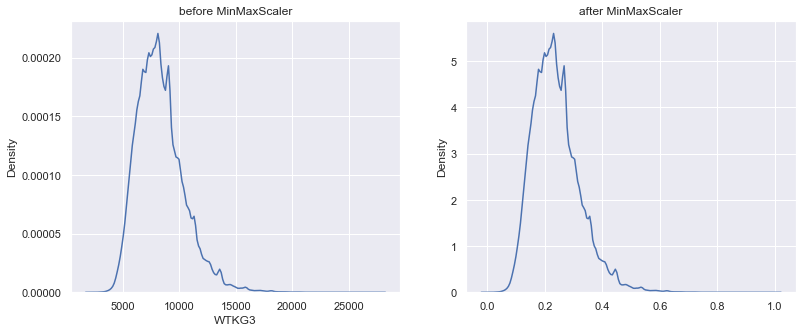

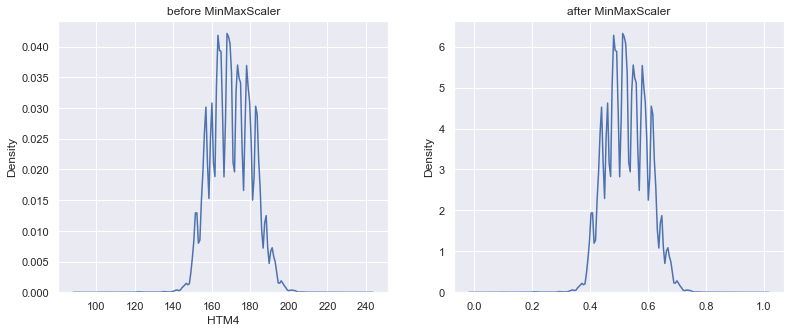

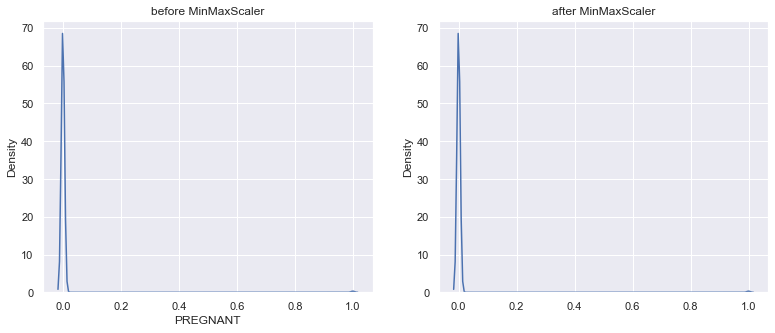

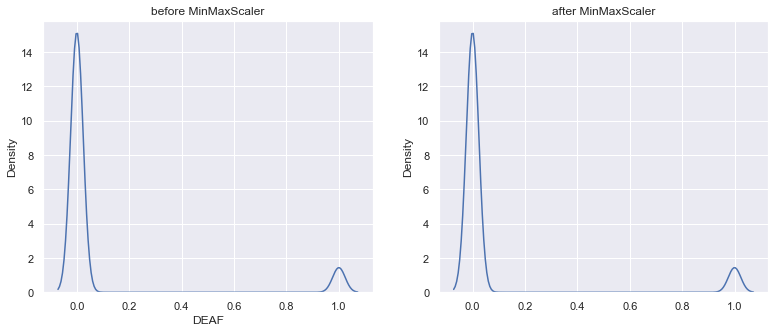

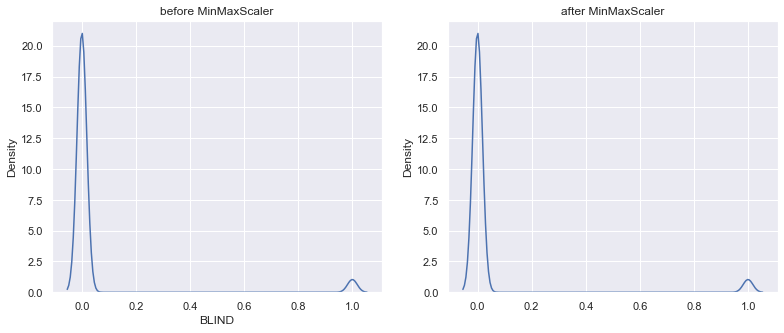

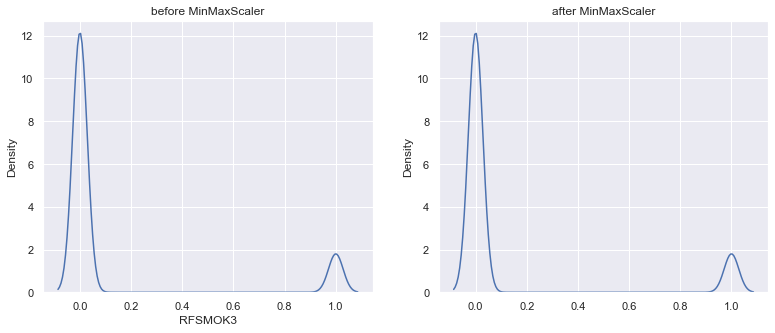

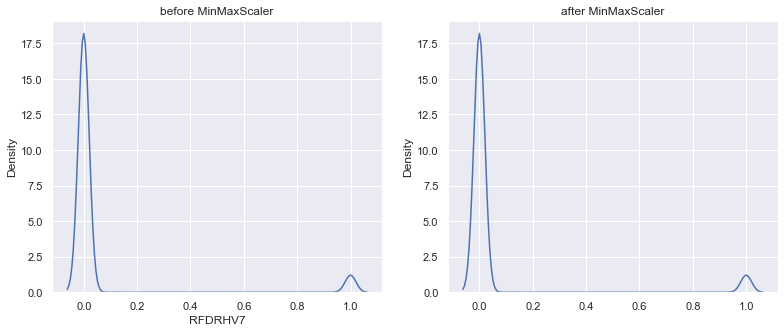

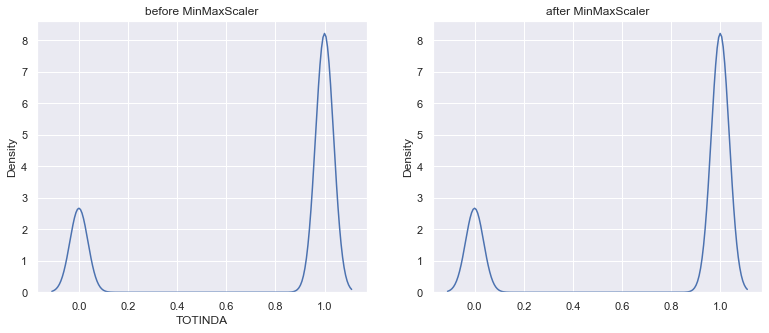

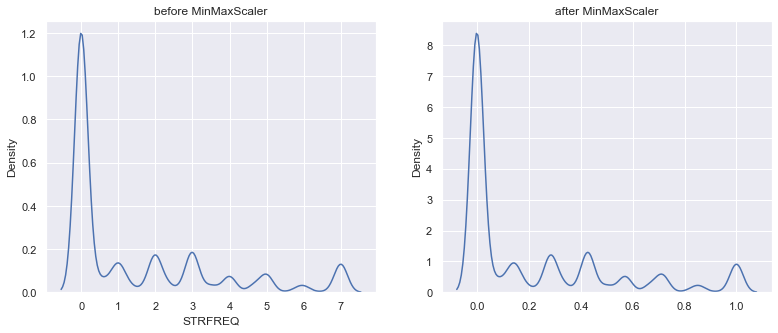

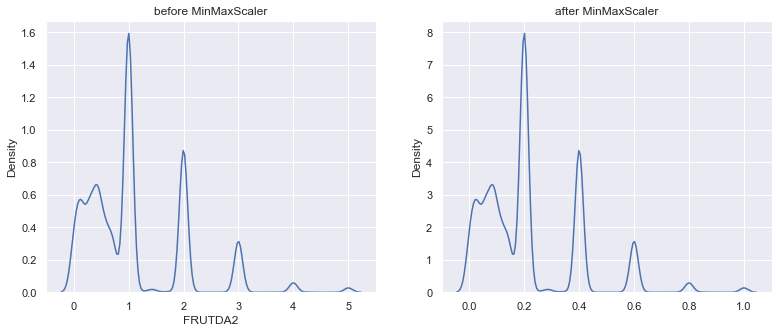

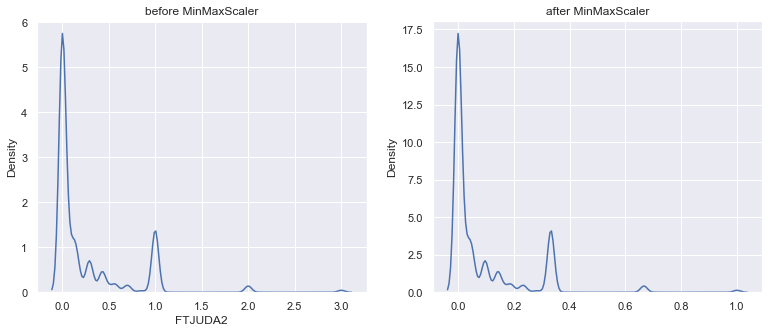

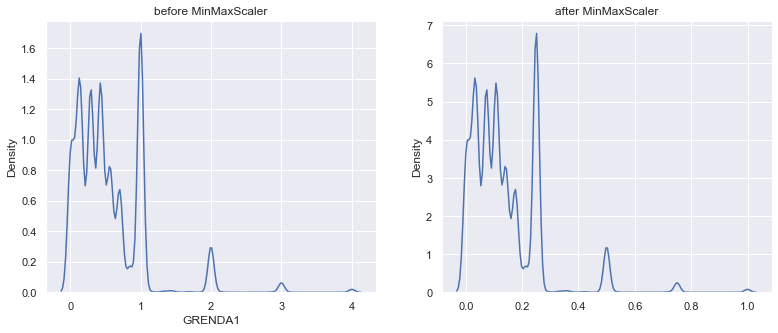

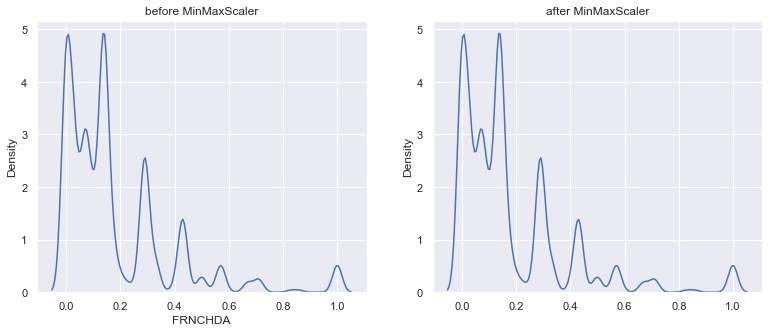

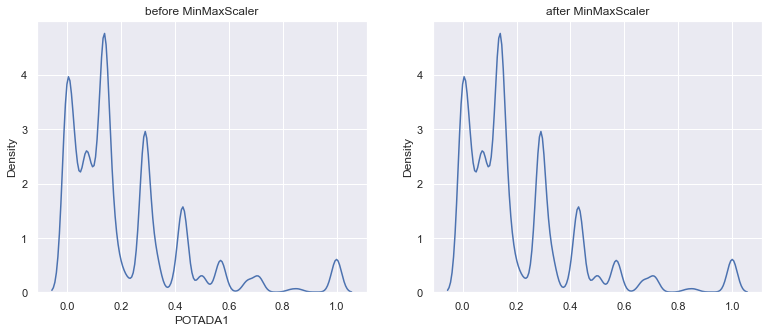

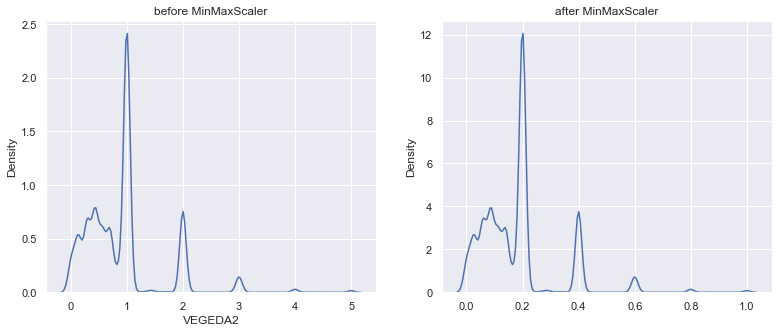

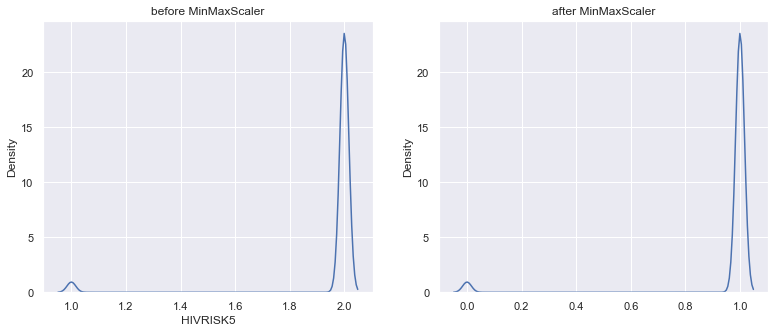

In [16]:
#checking data post scaling
for col in df.columns:
    plots(df,col, MinMaxScaler())
    
# Distribution is kept but range is standardised between 0-1.

In [17]:
df = pd.DataFrame(scaled, columns = df.columns)
# Setting default df variable to the scaled version

In [18]:
df.describe()
#check

,RFHYPE5,RFCHOL2,MICHD,CVDSTRK3,CASTHM1,CHCSCNCR,CHCOCNCR,CHCCOPD2,CHCKDNY2,DIABETE4,...,RFDRHV7,TOTINDA,STRFREQ,FRUTDA2,FTJUDA2,GRENDA1,FRNCHDA,POTADA1,VEGEDA2,HIVRISK5
count,221413.000000,221413.000000,221413.000000,221413.000000,221413.000000,221413.000000,221413.000000,221413.000000,221413.000000,221413.000000,...,221413.000000,221413.000000,221413.000000,221413.000000,221413.000000,221413.000000,221413.000000,221413.000000,221413.000000,221413.000000
mean,0.422437,0.386924,0.089683,0.041660,0.093373,0.107663,0.105224,0.080325,0.039194,0.143284,...,0.061984,0.754874,0.212019,0.211669,0.085062,0.134929,0.180987,0.207996,0.175628,0.961958
std,0.493948,0.487047,0.285728,0.199811,0.290955,0.309955,0.306843,0.271796,0.194056,0.350363,...,0.241127,0.430163,0.301668,0.178783,0.145012,0.125303,0.206666,0.218510,0.134934,0.191298
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.086000,0.000000,0.035000,0.030000,0.070000,0.086000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.200000,0.006667,0.107500,0.140000,0.140000,0.172000,1.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.428571,0.228000,0.096667,0.177500,0.290000,0.290000,0.200000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
# set X for independent vars while y is the collection of dependent vars
X = df[x_col]
y = df[target_d]

# SMOTE 

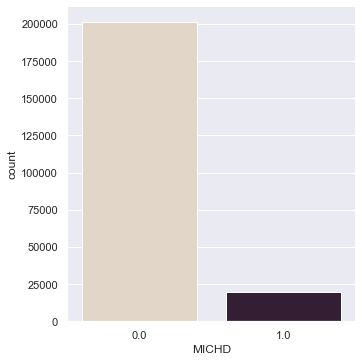

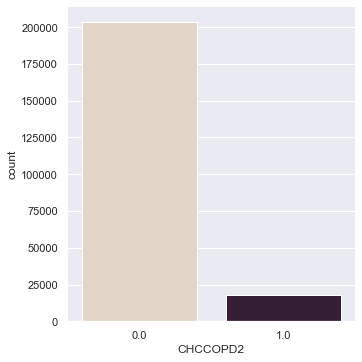

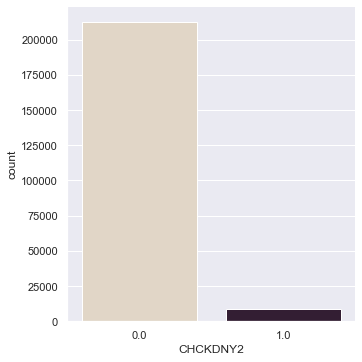

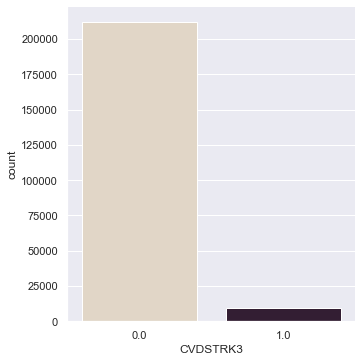

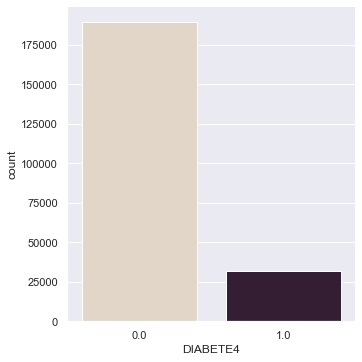

In [20]:
for x in range(len(target_d)):
    sns.catplot(x= df[target_d[x]], kind="count", palette="ch:.25", data=df)
#     ax = plt.axes() 
#     ax.set_title(f'Class Proportion for {target_d[x]}')
#     plt.show()
#from simple countplots, we can see that there are imbalances in the target variables.

In [21]:
# exact extent of imbalance
for i in range(len(target_d)):
    print(round(df[f'{target_d[i]}'].value_counts() / len(df), 2)) 
# very imbalanced, mostly in the 90/10 range.

0.0    0.91
1.0    0.09
Name: MICHD, dtype: float64
0.0    0.92
1.0    0.08
Name: CHCCOPD2, dtype: float64
0.0    0.96
1.0    0.04
Name: CHCKDNY2, dtype: float64
0.0    0.96
1.0    0.04
Name: CVDSTRK3, dtype: float64
0.0    0.86
1.0    0.14
Name: DIABETE4, dtype: float64


In [22]:
from sklearn.model_selection import train_test_split
# creating a set of un-smoted test data for later testing

In [23]:
X0_train, X0_test, y0_train, y0_test = \
train_test_split(X,df[target_d[0]],test_size=0.3,random_state=42)

In [24]:
X1_train, X1_test, y1_train, y1_test = \
train_test_split(X,df[target_d[1]],test_size=0.3,random_state=42)

In [25]:
X2_train, X2_test, y2_train, y2_test = \
train_test_split(X,df[target_d[2]],test_size=0.3,random_state=42)

In [26]:
X3_train, X3_test, y3_train, y3_test = \
train_test_split(X,df[target_d[3]],test_size=0.3,random_state=42)

In [27]:
X4_train, X4_test, y4_train, y4_test = \
train_test_split(X,df[target_d[4]],test_size=0.3,random_state=42)

In [28]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
# Assumption = 1 Person can only have 1 disease!

In [29]:
# for i in range(5):
#     Xi, y_i = oversample.fit_resample(X, df[target_d[i]])

In [30]:
X0_os, y0_os = oversample.fit_resample(X0_train, y0_train)
# not smote-ing test set to prevent overfitting issue 
# Model that was trained on SMOTE-ed data will perform too well if it tests on SMOTE-ed data 
# i.e only being tested on what you studied on.

In [31]:
# print(round(X1[f'{target_d[1]}'].value_counts() / len(X1), 2))
from collections import Counter
print("MICHD")
print("Before SMOTE :", Counter(y0_train))
print("After SMOTE :", Counter(y0_os))

MICHD
Before SMOTE : Counter({0.0: 141066, 1.0: 13923})
After SMOTE : Counter({0.0: 141066, 1.0: 141066})


In [32]:
X1_os, y1_os = oversample.fit_resample(X1_train, y1_train)
X2_os, y2_os = oversample.fit_resample(X2_train, y2_train)
X3_os, y3_os = oversample.fit_resample(X3_train, y3_train)
X4_os, y4_os = oversample.fit_resample(X4_train, y4_train)
# SMOTE all

In [33]:
print("MICHD")
print("Before SMOTE :", Counter(y0_train))
print("After SMOTE :", Counter(y0_os))
print("CHCCOPD2")
print("Before SMOTE :", Counter(y1_train))
print("After SMOTE :", Counter(y1_os))
print("CHCKDNY2")
print("Before SMOTE :", Counter(y2_train))
print("After SMOTE :", Counter(y2_os))
print("CVDSTRK3")
print("Before SMOTE :", Counter(y3_train))
print("After SMOTE :", Counter(y3_os))
print("DIABETE4")
print("Before SMOTE :", Counter(y4_train))
print("After SMOTE :", Counter(y4_os))

MICHD
Before SMOTE : Counter({0.0: 141066, 1.0: 13923})
After SMOTE : Counter({0.0: 141066, 1.0: 141066})
CHCCOPD2
Before SMOTE : Counter({0.0: 142581, 1.0: 12408})
After SMOTE : Counter({0.0: 142581, 1.0: 142581})
CHCKDNY2
Before SMOTE : Counter({0.0: 148848, 1.0: 6141})
After SMOTE : Counter({0.0: 148848, 1.0: 148848})
CVDSTRK3
Before SMOTE : Counter({0.0: 148596, 1.0: 6393})
After SMOTE : Counter({0.0: 148596, 1.0: 148596})
DIABETE4
Before SMOTE : Counter({0.0: 132766, 1.0: 22223})
After SMOTE : Counter({0.0: 132766, 1.0: 132766})


## Start of NN

In [35]:
from numpy.random import seed
seed(42)

In [36]:
# Source: https://www.youtube.com/watch?v=aBIGJeHRZLQ

print(X0_os.shape)
print(y0_os.shape)
print(X0_test.shape)
print(y0_test.shape)
# for input shape

(282132, 32)
(282132,)
(66424, 32)
(66424,)


In [37]:
model0 = keras.Sequential([
    keras.layers.Dense(32, input_shape=(32,), activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(16, activation='relu'), 
    keras.layers.Dense(1, activation='sigmoid')])


model0.compile(optimizer='adam', 
	          loss=keras.losses.BinaryCrossentropy(from_logits=True),
	          metrics=['Recall']) 

In [38]:
model0.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 1,873
Trainable params: 1,873
Non-trainable params: 0
_________________________________________________________________


# Fit for MICHD

In [39]:
# https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/
model0.fit(X0_os.values, y0_os.values, batch_size=16, epochs=10)

Epoch 1/10
17634/17634 [==============================] - 29s 2ms/step - loss: 0.5223 - recall: 0.7780
Epoch 2/10
17634/17634 [==============================] - 27s 2ms/step - loss: 0.4931 - recall: 0.8064
Epoch 3/10
17634/17634 [==============================] - 21s 1ms/step - loss: 0.4801 - recall: 0.8072
Epoch 4/10
17634/17634 [==============================] - 27s 2ms/step - loss: 0.4721 - recall: 0.8093
Epoch 5/10
17634/17634 [==============================] - 27s 2ms/step - loss: 0.4677 - recall: 0.8107
Epoch 6/10
17634/17634 [==============================] - 27s 2ms/step - loss: 0.4629 - recall: 0.8147
Epoch 7/10
17634/17634 [==============================] - 27s 2ms/step - loss: 0.4612 - recall: 0.8126
Epoch 8/10
17634/17634 [==============================] - 24s 1ms/step - loss: 0.4596 - recall: 0.8176
Epoch 9/10
17634/17634 [==============================] - 17s 985us/step - loss: 0.4546 - recall: 0.8179
Epoch 10/10
17634/17634 [==============================] - 17s 990us/st

In [40]:
print("EVALUATION")
model0.evaluate(X0_test.values, y0_test.values)

EVALUATION
2076/2076 [==============================] - 2s 716us/step - loss: 0.4817 - recall: 0.6299


[0.4817340075969696, 0.62992924451828]

In [41]:
y0_pred = model0.predict_classes(X0_test.values)
print("Prediction", y0_pred)
# np.array(X0_os.iloc[0])

Prediction [[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [1]]


In [42]:
unique_elements, counts_elements = np.unique(y0_pred, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[    0     1]
 [48234 18190]]


In [43]:
from sklearn.metrics import confusion_matrix, classification_report

cm0 = confusion_matrix(y0_test, y0_pred)
cm0

array([[46038, 14452],
       [ 2196,  3738]], dtype=int64)

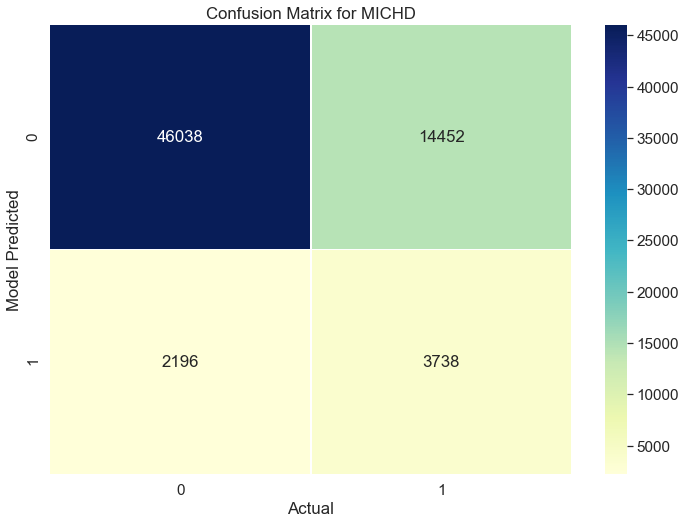

In [44]:
sns.set(font_scale=1.4)
sns.heatmap(cm0, annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
ax = plt.axes() 
ax.set(xlabel='Actual', ylabel='Model Predicted')
ax.set_title('Confusion Matrix for MICHD')
plt.show()

In [45]:
print(classification_report(y0_test, y0_pred))
# Model Accuracy = 75%
# Model Recall = 77% for Class 0, 62% for class 1

              precision    recall  f1-score   support

         0.0       0.95      0.76      0.85     60490
         1.0       0.21      0.63      0.31      5934

    accuracy                           0.75     66424
   macro avg       0.58      0.70      0.58     66424
weighted avg       0.89      0.75      0.80     66424



# Fit for CHCCOPD2

In [46]:
model1 = keras.Sequential([
    keras.layers.Dense(32, input_shape=(32,), activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(16, activation='relu'), 
    keras.layers.Dense(1, activation='sigmoid')])


model1.compile(optimizer='adam', 
	          loss=keras.losses.BinaryCrossentropy(from_logits=True),
	          metrics=['Recall'])

In [47]:
model1.fit(X1_os.values, y1_os.values, batch_size=16, epochs=10)

Epoch 1/10
17823/17823 [==============================] - 18s 991us/step - loss: 0.5046 - recall: 0.7845
Epoch 2/10
17823/17823 [==============================] - 17s 979us/step - loss: 0.4750 - recall: 0.7917
Epoch 3/10
17823/17823 [==============================] - 17s 979us/step - loss: 0.4602 - recall: 0.7959
Epoch 4/10
17823/17823 [==============================] - 17s 977us/step - loss: 0.4503 - recall: 0.8030
Epoch 5/10
17823/17823 [==============================] - 17s 976us/step - loss: 0.4444 - recall: 0.8100
Epoch 6/10
17823/17823 [==============================] - 17s 976us/step - loss: 0.4396 - recall: 0.8096
Epoch 7/10
17823/17823 [==============================] - 17s 978us/step - loss: 0.4350 - recall: 0.8085
Epoch 8/10
17823/17823 [==============================] - 17s 975us/step - loss: 0.4321 - recall: 0.8137
Epoch 9/10
17823/17823 [==============================] - 17s 975us/step - loss: 0.4260 - recall: 0.8131
Epoch 10/10
17823/17823 [==============================

In [48]:
print("EVALUATION")
model1.evaluate(X1_test.values, y1_test.values)

EVALUATION
2076/2076 [==============================] - 2s 694us/step - loss: 0.4042 - recall: 0.5903


[0.4042093753814697, 0.5902919769287109]

In [49]:
y1_pred = model1.predict_classes(X1_test.values)
print("Prediction", y1_pred)

Prediction [[0]
 [0]
 [0]
 ...
 [0]
 [1]
 [0]]


In [50]:
unique_elements, counts_elements = np.unique(y1_pred, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[    0     1]
 [53085 13339]]


In [51]:
cm1 = confusion_matrix(y1_test, y1_pred)
cm1

array([[50882, 10165],
       [ 2203,  3174]], dtype=int64)

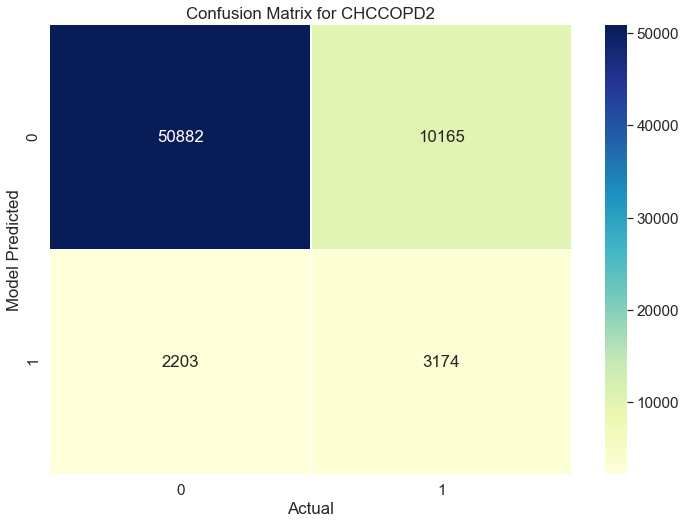

In [52]:
sns.set(font_scale=1.4)
sns.heatmap(cm1, annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
ax = plt.axes()
ax.set(xlabel='Actual', ylabel='Model Predicted')
ax.set_title('Confusion Matrix for CHCCOPD2')
plt.show()

In [53]:
print(classification_report(y1_test, y1_pred))
# Model Accuracy = 76%
# Model Recall = 76% for Class 0, 67% for class 1

              precision    recall  f1-score   support

         0.0       0.96      0.83      0.89     61047
         1.0       0.24      0.59      0.34      5377

    accuracy                           0.81     66424
   macro avg       0.60      0.71      0.62     66424
weighted avg       0.90      0.81      0.85     66424



# Fit for CHCKDNY2

In [54]:
model2 = keras.Sequential([
    keras.layers.Dense(32, input_shape=(32,), activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(16, activation='relu'), 
    keras.layers.Dense(1, activation='sigmoid')])

model2.compile(optimizer='adam', 
	          loss=keras.losses.BinaryCrossentropy(from_logits=True),
	          metrics=['Recall'])

In [55]:
model2.fit(X2_os.values, y2_os.values, batch_size=16, epochs=10)

Epoch 1/10
18606/18606 [==============================] - 17s 882us/step - loss: 0.5362 - recall: 0.7643
Epoch 2/10
18606/18606 [==============================] - 17s 923us/step - loss: 0.5002 - recall: 0.7949
Epoch 3/10
18606/18606 [==============================] - 17s 894us/step - loss: 0.4834 - recall: 0.8054
Epoch 4/10
18606/18606 [==============================] - 17s 896us/step - loss: 0.4695 - recall: 0.8149
Epoch 5/10
18606/18606 [==============================] - 17s 888us/step - loss: 0.4606 - recall: 0.8198
Epoch 6/10
18606/18606 [==============================] - 16s 883us/step - loss: 0.4522 - recall: 0.8203
Epoch 7/10
18606/18606 [==============================] - 16s 882us/step - loss: 0.4427 - recall: 0.8235
Epoch 8/10
18606/18606 [==============================] - 17s 888us/step - loss: 0.4383 - recall: 0.8234
Epoch 9/10
18606/18606 [==============================] - 16s 885us/step - loss: 0.4333 - recall: 0.8269
Epoch 10/10
18606/18606 [==============================

In [56]:
print("EVALUATION")
model2.evaluate(X2_test.values, y2_test.values)

EVALUATION
2076/2076 [==============================] - 2s 685us/step - loss: 0.5015 - recall: 0.5928


[0.5014943480491638, 0.5928261876106262]

In [57]:
y2_pred = model2.predict_classes(X2_test.values)
print("Prediction", y2_pred)
# np.array(X0_os.iloc[0])

Prediction [[1]
 [0]
 [0]
 ...
 [0]
 [1]
 [1]]


In [58]:
unique_elements, counts_elements = np.unique(y2_pred, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[    0     1]
 [48428 17996]]


In [59]:
cm2 = confusion_matrix(y2_test, y2_pred)
cm2

array([[47395, 16492],
       [ 1033,  1504]], dtype=int64)

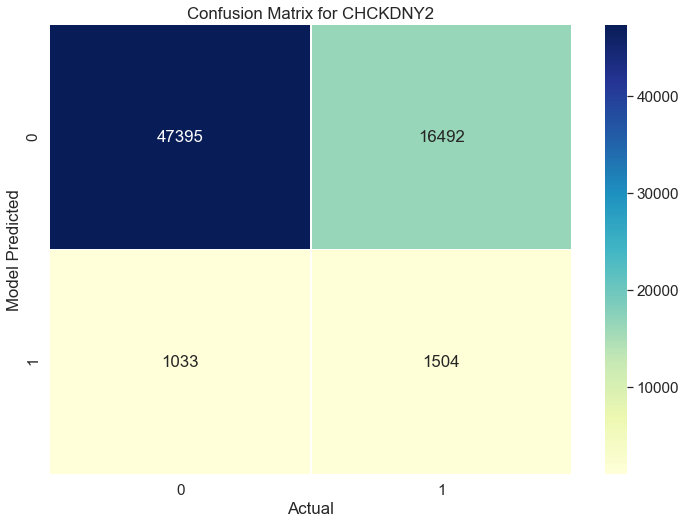

In [60]:
sns.set(font_scale=1.4)
sns.heatmap(cm2, annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
ax = plt.axes()
ax.set(xlabel='Actual', ylabel='Model Predicted')
ax.set_title('Confusion Matrix for CHCKDNY2')
plt.show()

In [61]:
print(classification_report(y2_test, y2_pred))

# Model Accuracy = 77%
# Model Recall = 78% for Class 0, 53% for class 1

              precision    recall  f1-score   support

         0.0       0.98      0.74      0.84     63887
         1.0       0.08      0.59      0.15      2537

    accuracy                           0.74     66424
   macro avg       0.53      0.67      0.50     66424
weighted avg       0.94      0.74      0.82     66424



# Fit for CVDSTRK3

In [62]:
model3 = keras.Sequential([
    keras.layers.Dense(32, input_shape=(32,), activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(16, activation='relu'), 
    keras.layers.Dense(1, activation='sigmoid')])

#final layer = 2 because for each NN we are making, its for 1 disease thus its either Yes/No.

model3.compile(optimizer='adam', 
	          loss=keras.losses.BinaryCrossentropy(from_logits=True),
	          metrics=['Recall'])

In [63]:
model3.fit(X3_os.values, y3_os.values, batch_size=16, epochs=10)

Epoch 1/10
18575/18575 [==============================] - 18s 965us/step - loss: 0.5304 - recall: 0.7793
Epoch 2/10
18575/18575 [==============================] - 18s 972us/step - loss: 0.4914 - recall: 0.8074
Epoch 3/10
18575/18575 [==============================] - 18s 972us/step - loss: 0.4768 - recall: 0.8172
Epoch 4/10
18575/18575 [==============================] - 18s 975us/step - loss: 0.4653 - recall: 0.8202
Epoch 5/10
18575/18575 [==============================] - 18s 973us/step - loss: 0.4520 - recall: 0.8269
Epoch 6/10
18575/18575 [==============================] - 18s 975us/step - loss: 0.4439 - recall: 0.8322
Epoch 7/10
18575/18575 [==============================] - 18s 972us/step - loss: 0.4366 - recall: 0.8356
Epoch 8/10
18575/18575 [==============================] - 18s 980us/step - loss: 0.4309 - recall: 0.8389
Epoch 9/10
18575/18575 [==============================] - 18s 977us/step - loss: 0.4250 - recall: 0.8443
Epoch 10/10
18575/18575 [==============================

In [64]:
print("EVALUATION")
model3.evaluate(X3_test.values, y3_test.values)

EVALUATION
2076/2076 [==============================] - 2s 687us/step - loss: 0.4186 - recall: 0.5147


[0.4185810685157776, 0.5146591067314148]

In [65]:
y3_pred = model3.predict_classes(X3_test.values)
print("Prediction", y3_pred)
# np.array(X0_os.iloc[0])

Prediction [[0]
 [0]
 [0]
 ...
 [0]
 [1]
 [0]]


In [66]:
unique_elements, counts_elements = np.unique(y3_pred, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[    0     1]
 [51948 14476]]


In [67]:
cm3 = confusion_matrix(y3_test, y3_pred)
cm3

array([[50574, 13019],
       [ 1374,  1457]], dtype=int64)

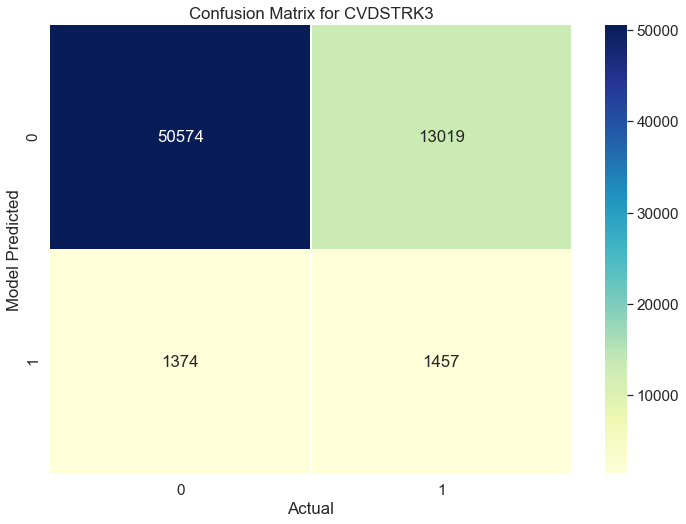

In [68]:
sns.set(font_scale=1.4)
sns.heatmap(cm3, annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
ax = plt.axes()
ax.set(xlabel='Actual', ylabel='Model Predicted')
ax.set_title('Confusion Matrix for CVDSTRK3')
plt.show()

In [69]:
print(classification_report(y3_test, y3_pred))
# Model Accuracy = 79%
# Model Recall = 88% for Class 0, 16% for class 1

              precision    recall  f1-score   support

         0.0       0.97      0.80      0.88     63593
         1.0       0.10      0.51      0.17      2831

    accuracy                           0.78     66424
   macro avg       0.54      0.65      0.52     66424
weighted avg       0.94      0.78      0.85     66424



# Fit for DIABETE4

In [70]:
#try do one hot encode
model4 = keras.Sequential([
    keras.layers.Dense(32, input_shape=(32,), activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(16, activation='relu'), 
    keras.layers.Dense(1, activation='sigmoid')])


model4.compile(optimizer='adam', 
	          loss=keras.losses.BinaryCrossentropy(from_logits=True),
	          metrics=['Recall'])

In [71]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_17 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_18 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 17        
Total params: 1,873
Trainable params: 1,873
Non-trainable params: 0
_________________________________________________________________


In [72]:
model4.fit(X4_os.values, y4_os.values, 
           batch_size=16, epochs=10)

Epoch 1/10
16596/16596 [==============================] - 16s 954us/step - loss: 0.5353 - recall: 0.7848
Epoch 2/10
16596/16596 [==============================] - 16s 967us/step - loss: 0.5042 - recall: 0.8043
Epoch 3/10
16596/16596 [==============================] - 16s 975us/step - loss: 0.4947 - recall: 0.8082
Epoch 4/10
16596/16596 [==============================] - 16s 971us/step - loss: 0.4907 - recall: 0.8090
Epoch 5/10
16596/16596 [==============================] - 16s 965us/step - loss: 0.4881 - recall: 0.8120
Epoch 6/10
16596/16596 [==============================] - 16s 974us/step - loss: 0.4833 - recall: 0.8096
Epoch 7/10
16596/16596 [==============================] - 16s 969us/step - loss: 0.4787 - recall: 0.8091
Epoch 8/10
16596/16596 [==============================] - 16s 969us/step - loss: 0.4748 - recall: 0.8118
Epoch 9/10
16596/16596 [==============================] - 16s 972us/step - loss: 0.4735 - recall: 0.8143
Epoch 10/10
16596/16596 [==============================

In [73]:
print("EVALUATION")
model4.evaluate(X4_test.values, y4_test.values)

EVALUATION
2076/2076 [==============================] - 2s 690us/step - loss: 0.5042 - recall: 0.6847


[0.5041902661323547, 0.6846979856491089]

In [74]:
y4_pred = model4.predict_classes(X4_test.values)
print("Prediction", y4_pred)
# np.array(X0_os.iloc[0])

Prediction [[1]
 [0]
 [0]
 ...
 [0]
 [1]
 [0]]


In [75]:
unique_elements, counts_elements = np.unique(y4_pred, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[    0     1]
 [45123 21301]]


In [76]:
cm4 = confusion_matrix(y4_test, y4_pred)
cm4

array([[42127, 14795],
       [ 2996,  6506]], dtype=int64)

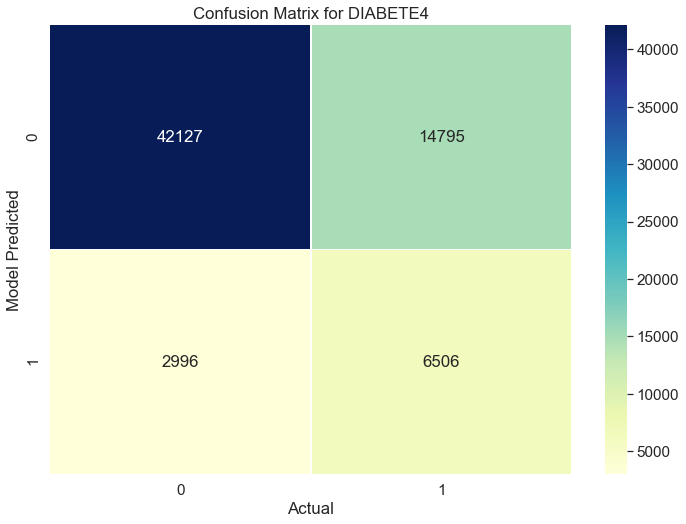

In [77]:
sns.set(font_scale=1.4)
sns.heatmap(cm4, annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
ax = plt.axes()
ax.set(xlabel='Actual', ylabel='Model Predicted')
ax.set_title('Confusion Matrix for DIABETE4')
plt.show()

In [78]:
print(classification_report(y4_test, y4_pred))
# Model Accuracy = 68%
# Model Recall = 66% for Class 0, 76% for class 1

              precision    recall  f1-score   support

         0.0       0.93      0.74      0.83     56922
         1.0       0.31      0.68      0.42      9502

    accuracy                           0.73     66424
   macro avg       0.62      0.71      0.62     66424
weighted avg       0.84      0.73      0.77     66424



# SHAP Section
## Objective to learn variable importance

In [79]:
import shap

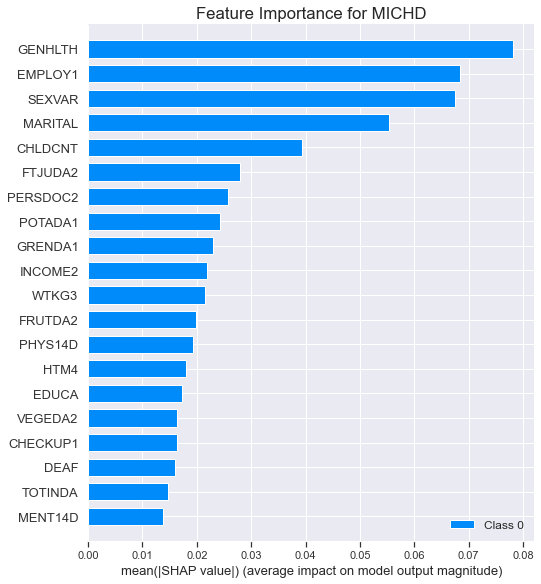

In [80]:
shap.initjs()
explainer1 = shap.DeepExplainer(model0, X0_test[:500].values)
shap_values = explainer1.shap_values(X0_test.values)
ax = plt.axes() 
ax.set_title('Feature Importance for MICHD')
shap.summary_plot(shap_values, X0_test)
plt.show()

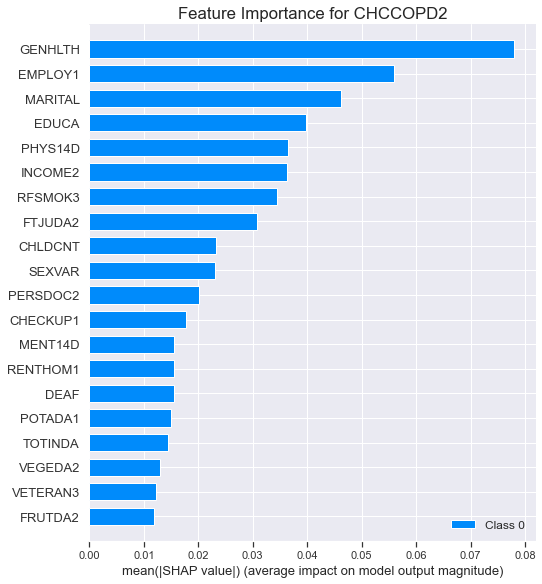

In [81]:
shap.initjs()
explainer1 = shap.DeepExplainer(model1, X1_test[:500].values)
shap_values1 = explainer1.shap_values(X1_test.values)
ax = plt.axes() 
ax.set_title('Feature Importance for CHCCOPD2')
shap.summary_plot(shap_values1, X1_test)
plt.show()

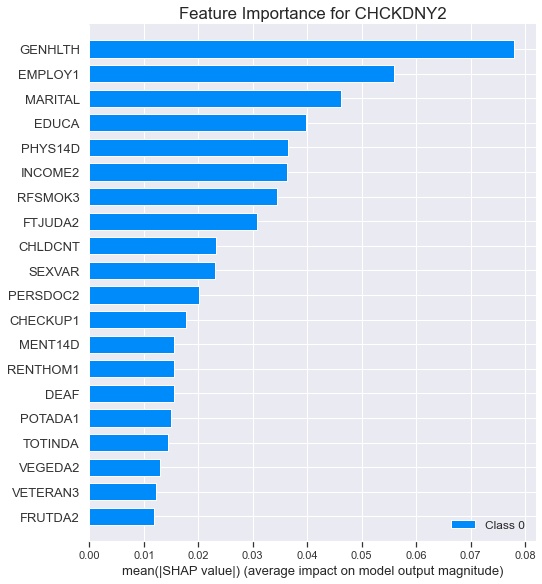

In [82]:
explainer2 = shap.DeepExplainer(model2, X2_test[:500].values)
shap_values2 = explainer1.shap_values(X2_test.values)# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
ax = plt.axes() 
ax.set_title('Feature Importance for CHCKDNY2')
shap.summary_plot(shap_values2, X2_test)
plt.show()

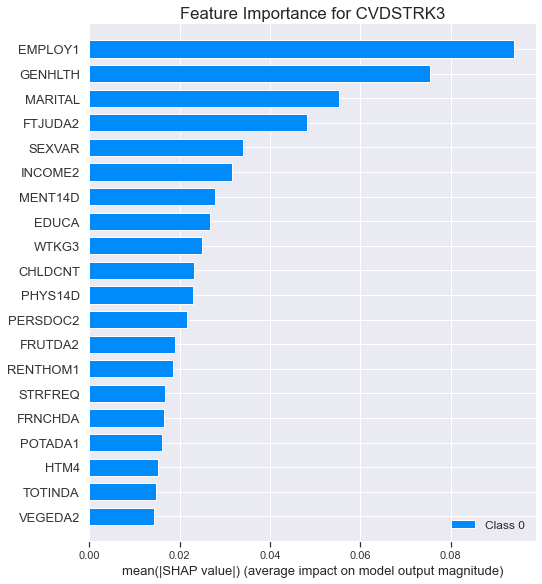

In [83]:
explainer3 = shap.DeepExplainer(model3, X3_os[:100].values)
shap_values3 = explainer3.shap_values(X3_test.values)
ax = plt.axes() 
ax.set_title('Feature Importance for CVDSTRK3')
shap.summary_plot(shap_values3, X3_test)
plt.show()

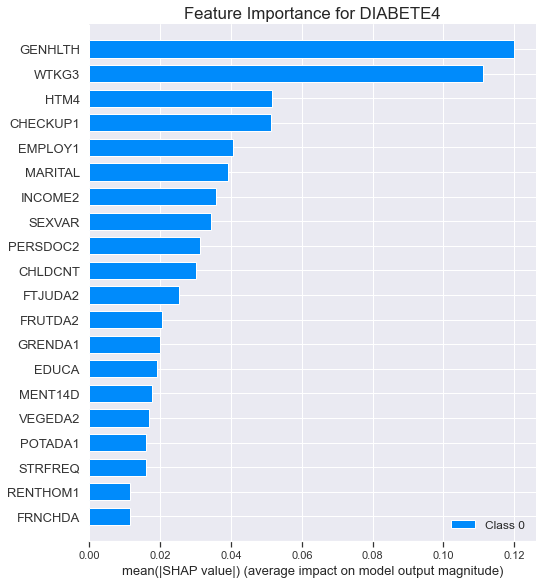

In [84]:
explainer4 = shap.DeepExplainer(model4, X4_os[:500].values)
shap_values4 = explainer4.shap_values(X4_test.values)
ax = plt.axes() 
ax.set_title('Feature Importance for DIABETE4')
shap.summary_plot(shap_values4, X4_test)
plt.show()

In [99]:
shap.force_plot(explainer4.expected_value, shap_values4, X4_test)

AssertionError: The shap_values arg looks looks multi output, try shap_values[i].

In [ ]:
shap.plots.force(explainer4.expected_value[0], shap_values4[0], feature_names = x_col)